<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%5BML_3%5DDataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 누락된 데이터 다루기

## 테이블 형태 데이터에서 누락된 값 식별

In [ ]:
import pandas as pd
from io import StringIO
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data)) #csv파일 불러와서 읽기
df


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## 누락된 값이 있는 훈련 샘플 제외

In [ ]:
df.dropna(axis =0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(axis =1) #NAN이 하나라도 있으면 그 열 삭제

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
df.dropna(subset=['C']) # 특정 열에 NAN이 있는 행만 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.dropna(thresh=4) #NAN이 아닌 값이 4개보다 작은 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


## 누락된 값 대체

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan,strategy = 'mean') #nan값을 평균값으로 보간
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T,validate=False)
imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

In [ ]:
imr = SimpleImputer(add_indicator=True)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ,  0. ,  0. ],
       [ 5. ,  6. ,  7.5,  8. ,  1. ,  0. ],
       [10. , 11. , 12. ,  6. ,  0. ,  1. ]])

In [ ]:
imr.indicator_.features_

array([2, 3])

In [ ]:
imr.indicator_.fit_transform(df.values)

array([[False, False],
       [ True, False],
       [False,  True]])

In [ ]:
imr.inverse_transform(imputed_data)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

iimr = IterativeImputer()
iimr.fit_transform(df.values)

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.00047063,  8.        ],
       [10.        , 11.        , 12.        , 12.99964527]])

In [ ]:
from sklearn.impute import KNNImputer #이거는 KNN을 사용하여 누락된 값을 채움 

kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
df.fillna(df.mean()) #pandas fillna 메서드

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [ ]:
df.fillna(method='bfill') #누락값을 다음 행의 값으로 채움

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.fillna(method='ffill') #이전행의 값으로 채움

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,8.0
2,10.0,11.0,12.0,8.0


In [ ]:
df.fillna(method='ffill',axis=1) #이렇게 설정할시 행이 아니라 열을 사용

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,8.0
2,10.0,11.0,12.0,12.0


## 사이킷런 추정기 API

In [ ]:
from IPython.display import Image
Image(url='https://git.io/Jtmwv', width=400)  #변환기

In [ ]:
Image(url='https://git.io/JtYZW', width=300) #추정기

# 범주형 데이터 다루기

## 범주형 데이터 인코딩

In [ ]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ('color','size','price','classlabel')

df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## 순서가 있는 특성 mapping

In [ ]:
size_mapping={
                'XL':3,
                'L':2,
                'M':1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## 클래스 label 인코딩

In [ ]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [ ]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
from sklearn.preprocessing import LabelEncoder

class_temp = LabelEncoder()
y = class_temp.fit_transform(df['classlabel'])
y

array([1, 0, 1])

In [ ]:
y= class_temp.inverse_transform(y)
y

array(['class2', 'class1', 'class2'], dtype=object)

## 순서가 없는 특성에 원-핫 인코딩 적용

In [ ]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
color_le
X
#color_le

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
col_trans = ColumnTransformer([('ord_enc',ord_enc,['color'])])
X_trans = col_trans.fit_transform(df)
X_trans



array([[1],
       [2],
       [0]])

In [ ]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color','size','price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.compose import ColumnTransformer
X = df[['color','size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot',OneHotEncoder(dtype=int),[0]),
    ('nothing','passthrough',[1,2])
    ]) #'passthrough' 옵션은 두 열을 변경하지않고 그대로 두기 위해 사용함
c_transf.fit_transform(X)

array([[0, 1, 0, 1, 10.1],
       [0, 0, 1, 2, 13.5],
       [1, 0, 0, 3, 15.3]], dtype=object)

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']]) #pandas에서는 getdummies로 더 편하게 사용 가능 

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [ ]:
pd.get_dummies(df[['price', 'color', 'size']],columns=['size'])

,price,color,size_1,size_2,size_3
0,10.1,green,1,0,0
1,13.5,red,0,1,0
2,15.3,blue,0,0,1


In [ ]:
pd.get_dummies(df[['price', 'color', 'size']],columns=['price'])

,color,size,price_10.1,price_13.5,price_15.3
0,green,1,1,0,0
1,red,2,0,1,0
2,blue,3,0,0,1


In [ ]:
pd.get_dummies(df[['price', 'color', 'size']],drop_first=True) #첫번째 열을 삭제

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
color_ohe = OneHotEncoder(categories='auto', drop='first') #다중 공선성 문제 처리
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

## 순서가 있는 특성 인코딩

In [ ]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
df['x>M'] = df['size'].apply(lambda x:1 if x in{'L','XL'} else 0)
df['x>L'] = df['size'].apply(lambda x:1 if x=='XL' else 0)

df

,color,size,price,classlabel,x>M,x>L
0,green,M,10.1,class2,0,0
1,red,L,13.5,class1,1,0
2,blue,XL,15.3,class2,1,1


# 데이터셋을 훈련 데이터셋과 테스트 데이터 셋으로 나누기

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0,stratify=y) #stratify는 비율유지하면서 분리함, 비율은 30%

# 특성 스케일 맞추기

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler() #최대 최소 스케일 [0,1]으로 조정, normalization
X_train_norm = mms.fit_transform(X_train) #train은 fit_transform 메서드를 적용하고, test는 transform메서드를 적용하는 이유는 train에서 사용한 평균꽈 표준편차 값을 test데이터에다가도 똑같이 사용하기 위해서임
X_test_norm = mms.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) #standarization 평균은0 표준편차를 1
X_test_std = stdsc.transform(X_test)

In [ ]:
#코드 구현으로도 한번 해보자

ex = np.array([0,1,2,3,4,5])
print('standarization', (ex - ex.mean()) / ex.std())

print('normalization', (ex - ex.min()) / (ex.max() - ex.min()))



standarization [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalization [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
from sklearn.preprocessing import RobustScaler #robust는 이상치가 많이 포함된 작은 데이터셋을 다룰떄 유리함 (과적합 될거같으면 robust가 효율이 훨신 좋음) , 중간값을 뺴고 차 값을 이용해서 스케일을 조정하기 때문

rbs = RobustScaler()
X_train_rbs = rbs.fit_transform(X_train)
X_test_rbs = rbs.transform(X_test)


In [ ]:
from sklearn.preprocessing import MaxAbsScaler #얘는 데이터를 최대 절대값으로 나눔 -> 각 특성의 최댓값은 1 전체 특성은 [-1,1]
mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale #얘내도 대응함수들이 당연히 존재함 -> 함수로도 지원함
print('StandardScaler:', scale(ex))
print('MinMaxScaler:', minmax_scale(ex))
print('RobustScaler:', robust_scale(ex))
print('MaxAbsScaler:', maxabs_scale(ex))

StandardScaler: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
MinMaxScaler: [0.  0.2 0.4 0.6 0.8 1. ]
RobustScaler: [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler: [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
from sklearn.preprocessing import Normalizer #얘는 샘플별로 정규화를 함 

nrm = Normalizer()
X_train_l2 = nrm.fit_transform(X_train)

# 유용한 특성 선택

과적합을 막기 위해서는
- 더많은 훈련 데이터를 모으기
- 규제를 통해 복잡도 제한
- 파라미터 개수가 적은 간단한 모델을 선택
- 데이터 차원을 줄이기

## 모델 복잡도 제한을 위한 L2 규제

In [ ]:
Image(url='https://git.io/JtY8I', width=500) 

In [ ]:
Image(url='https://git.io/JtY8L', width=500) 

##  모델 복잡도 제한을 위한 L1 규제

In [ ]:
Image(url='https://git.io/JtY8t', width=500) 

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver='liblinear')

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty = 'l1', C=1.0, random_state =1)

In [ ]:
lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [ ]:
lr.intercept_ #절편 확인

array([-1.26392152, -1.21596534, -2.37040177])

In [ ]:
lr.coef_ #가중치 배열확인

array([[ 1.24567209,  0.18072301,  0.74682115, -1.16438451,  0.        ,
         0.        ,  1.1595535 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55864751,  2.50891241],
       [-1.53644846, -0.38769843, -0.99485417,  0.36489012, -0.05989298,
         0.        ,  0.66853184,  0.        ,  0.        , -1.93460212,
         1.23246414,  0.        , -2.23212696],
       [ 0.1355558 ,  0.16880291,  0.35718019,  0.        ,  0.        ,
         0.        , -2.43768478,  0.        ,  0.        ,  1.5635432 ,
        -0.81834553, -0.4930494 ,  0.        ]])

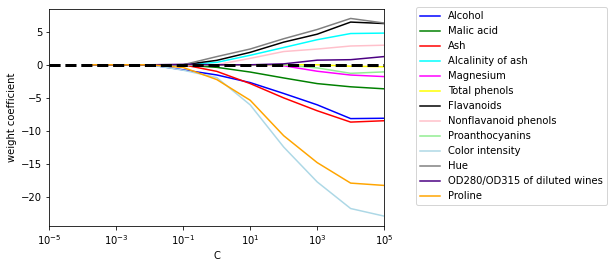

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111) #칸하나 만들어주고

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights,params = [],[]


for c in np.arange(-4.,6.):
  lr = LogisticRegression(solver='liblinear', penalty = 'l1', C=10.**c, random_state =0)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for columns, color in zip(range(weights.shape[1]),colors):
  plt.plot(params,weights[:,columns],label=df_wine.columns[columns+1],color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True) #L1규제에 따른 파라미터 변화 예시로 확인

## 순차 특성 선택 알고리즘

SBS 알고리즘
- 알고리즘을 k=d로 초기화
- 조건 x = argmaxJ(X_k-x)를 최대화 하는 특성 x를 결정
- 특성 집합에서 특성 x를 제거 
- k가 목표하는 특성 개수가 되면 종료 아닐경우 2단계로 돌아감

In [105]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self,estimator,k_features,scoring = accuracy_score,test_size=0.25,random_state =1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state
  
  def fit(self,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = self.test_size,random_state=self.random_state)
  
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score]
    
    while dim > self.k_features: #목표 차원 매개변수
      scores = []
      subsets = []

      for p in combinations(self.indices_, r = dim -1):
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1

      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]

  def transfrom(self, X):
    return X[:,self.indices_]

  def _calc_score(self,X_train,y_train,X_test,y_test,indices):
    self.estimator.fit(X_train[:,indices],y_train)
    y_pred = self.estimator.predict(X_test[:,indices])
    score = self.scoring(y_test,y_pred)
    return score



In [106]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

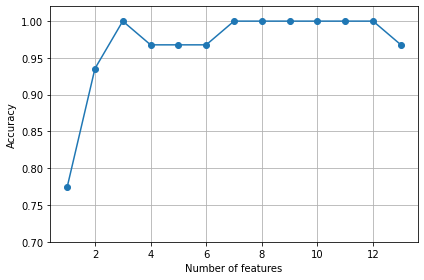

In [107]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 선택한 특성의 성능을 출력
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show() # 차원의 저주 때문에 특성 개수가 적으면 정확도 증가하는 구간이 있음 

In [108]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [110]:
df_wine.columns[1:][k3]

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')

In [111]:
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


In [112]:
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test)) #특성개수를 줄여서 학습을 시켜봄, 특성개수는 1/4로 확 줄어들었지만 정확도는 크게 떨어지지 않음 -> 해석용이 

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


In [113]:
from sklearn.feature_selection import SequentialFeatureSelector # 사이킷런에서 특성 선택 알고리즘도 제공해줌


scores = []
for n_features in range(1,13):
  sfs = SequentialFeatureSelector(knn,n_features_to_select=n_features,n_jobs= -1)
  sfs.fit(X_train_std,y_train)

  f_mask = sfs.support_
  knn.fit(X_train_std[:,f_mask],y_train)
  scores.append(knn.score(X_train_std[:,f_mask],y_train))

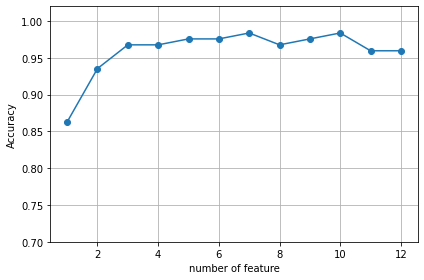

In [116]:
plt.plot(range(1,13),scores,marker = 'o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('number of feature')
plt.grid()
plt.tight_layout()
plt.show() #7일때 가장 높게 나옴

In [117]:
sfs = SequentialFeatureSelector(knn,n_features_to_select= 7,n_jobs = -1) 
sfs.fit(X_train_std,y_train)

print(sfs.n_features_to_select_)

7


In [118]:
f_mask = sfs.support_ # 특성 선택해주고
df_wine.columns[1:][f_mask] #확인

Index(['Alcohol', 'Ash', 'Magnesium', 'Flavanoids', 'Color intensity', 'Hue',
       'Proline'],
      dtype='object')

In [120]:
knn.fit(X_train_std[:,f_mask],y_train) #정확도가 올라간 모습을 볼 수 있따.
print('훈련 정확도',knn.score(X_train_std[:,f_mask],y_train))
print('테스트 정확도',knn.score(X_test_std[:,f_mask],y_test))

훈련 정확도 0.9838709677419355
테스트 정확도 0.9814814814814815
